## Метод Опорных векторов (Support Vector Machine)

Ранее мы рассматривали логистическую регрессию, когда решали задачи бинарной классификации. Мы выбирали гладкую функцию потерь для решения оптимизационной задачи в виде логарифма от сигмоиды, а также увидели, что этот лосс не единственный, который можно использовать. Рассмотрим еще один метод решения задачи классификации - **метод опорных векторов**.

Text(0.5, 0, 'M')

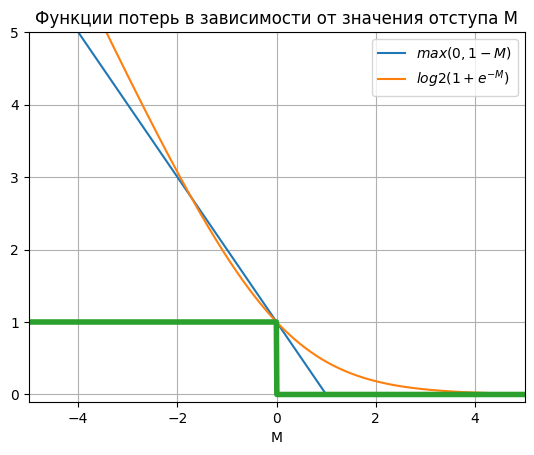

In [4]:
import numpy as np
import matplotlib.pyplot as plt

M = np.linspace(-5, 5, 1000)
#plt.plot(M, (1-M)**2, label='$(1-M)^2$')
plt.plot(M, np.maximum(0, 1-M), label='$max(0, 1-M)$')
#plt.plot(M, 2*(1+np.exp(M))**(-1), label='$2(1+e^M)^{-1}$')
plt.plot(M, np.log2(1+np.exp(-M)), label='$log2(1+e^{-M})$')
#plt.plot(M, np.exp(-M), label='$e^{-M}$')
plt.plot(M, 0.5*(np.sign(-M)+1), lw=4)
plt.xlim([-5, 5])
plt.ylim([-0.1, 5])

plt.legend()
plt.grid()
plt.title('Функции потерь в зависимости от значения отступа M')
plt.xlabel('M')

Рассмотрим линейно разделимую выборку. В реальных задачах такая ситуация почти никогда не встречается, но для иллюстрации работы метода она очень удобна.

(-3.0, 3.0)

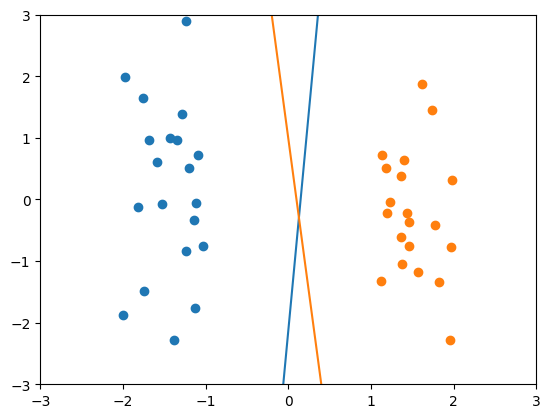

In [5]:
num_points = 20
x1 = np.random.random(num_points)-2
y1 = np.random.randn(num_points)

x2 = np.random.random(num_points)+1
y2 = np.random.randn(num_points)

plt.scatter(x1, y1)
plt.scatter(x2, y2)
plt.plot([-0.2, 0.5], [-5, 5])
plt.plot([0.5, -0.3], [-4, 4])

plt.xlim([-3, 3])
plt.ylim([-3, 3])

<center><img src="data//svm_classes.png" alt="drawing" width="900"/></center>

Видно, что оба классификатора разделяют выборку без ошибок. В общем, мы можем придумать много моделей, которые будут решать эту задачу без ошибок, т.е. решение неединственно в данном случае. Вопрос заключается в том, как нам выбрать одну лучшую гиперплоскость из всех возможных и в каком смысле одна плоскость будет "лучше" другой. Попробуем провести гиперплоскость на одинаковом удалении от обоих классов, т.е. будем максимизировать отступ (ширину между классами объектов).

<center><img src="data//svm_margin.png" alt="drawing" width="900"/></center>





Пусть самый ближний объект левого класса (крестики) имеет $(w\cdot x) = 1$, тогда у всех остальных элементов, лежащих дальше от разделяющей прямой, это же скалярное призведение будет больше $1$. Аналогично для правого класса (кружки). Будем максимизировать расстояние между крайним правым крестиком и крайним левым кружком:
$$ \frac{(w, x_+-x_-)}{||w||} \geq \frac{2}{||w||} \rightarrow max $$

Модуль отступа должен быть положителен для каждого класса объектов, так как выборка линейно разделима по нашему предположению. Можем переписать оптимизационную задачу в виде:
$$
\left\{
  \begin{array}{lr}
     \frac{1}{2}||w||^2 \rightarrow min, \quad \\
     M_i(w, w_0) \geq 1, \quad i=1,\dots n \\
  \end{array}
\right.
$$

Однако почти всегда выборка линейно неразделима. В данных может присутствовать шум, иметься сложные зависимости и т.д. Можно в модель добавить штраф за то, что объект попал в глубину другого класса. Тогда перепишем выражение выше в следующем виде:
$$
\left\{
  \begin{array}{lr}
     \frac{1}{2}||w||^2 + C\sum\limits_{i=1}^n \xi_i \rightarrow min, \quad \\
     M_i(w, w_0) \geq 1-\xi_i, \quad i=1,\dots n, \\
     \xi_i \geq 0,\quad i=1,\dots n
  \end{array}
\right.
$$


Где $\xi_i$ - штрафной член, положительная величина. Если из второго неравенства выразить $\xi_i$, то получится $\xi_i \geq 1-M_i(w, w_0)$, а чтобы выполнялось третье неравенство, необходимо добавить функцию $max$: $\xi_i \geq max(0, 1-M_i(w, w_0))$. Тогда функционал, который предстоит минимизировать, выглядит так:
$$
\sum\limits_{i=1}^n max(0, 1-M_i(w, w_0)) + \frac{1}{2C}||w||^2 \rightarrow min
$$
Здесь $C$ - регуляризационная константа,  которая отвечает за то, насколько мы штрафуем модель.

Итоговое положение плоскости задаётся всего несколькими обучающими примерами. Это ближайшие к плоскости правильно классифицированные объекты, которые называют **опорными векторами** или **support vectors**.

SVM можно обобщить на нелинейный случай. Отступ (margin) содержит в себе скалярное произведение. Появилась идея: а что если использовать другое скалярное произведение, заданное для другого пространства? Основная идея: использовать другое преобразование для задания скалярного произведения на другом Гильбертовом пространстве. Для этого вводится функция ядра (kernel), которая обладает простыми свойствами.

<center><img src="data//svm_classification.png" alt="drawing" width="800"/></center>

Плюсы алгоритма:
- Легко обобщить на нелинейный случай с помощью ядер
- Зависит от небольшого числа опорных векторов
- Существование уникального решения и доказуемо минимальная склонность к переобучению среди всех популярных классов линейных классификаторов

Минусы:
- Сильно растет сложность алгоритма с ростом количества объектов
- Необходимо подбирать много параметров (регуляризация, вид ядра, параметры для ядра и т.д.)
- Опорными объектами могут стать выбросы

### Support Vector Machine в Scikit-learn

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Загрузка данных
df_orig = pd.read_csv('data/healthcare-dataset-stroke-data.csv', index_col='id')
# Разделим датафрейм на y и X
y = df_orig['stroke'].copy()
X_orig = df_orig.drop(columns=['stroke'], inplace=False)
num_feat = len(X_orig.columns) 
num_obj = len(X_orig)
print(f'Количество признаков: {num_feat}')
print(f'Количество объектов: {num_obj}')
X_orig.head()

Количество признаков: 10
Количество объектов: 5110


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
id,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked


In [7]:
def ohe(df, features):
    """
    one-hot enccoder.
    df -- input DataFrame
    features -- list of features to be encoded

    One can easily use sklearn.preprocessing.OneHotEncoder instead
    """
    for feat in features:
        categ_list = df[feat].unique()
        df_enc = np.zeros((df.shape[0], len(categ_list)))
        for ii in range(len(categ_list)):
            df_enc[:, ii] = (df[feat]==categ_list[ii]).astype(int) 

        df_enc = pd.DataFrame(data=df_enc, index=df.index, columns=categ_list)
        df = pd.concat([df, df_enc], axis=1)
    return df

X_prep = X_orig.copy()
# Закодируем катогориальные признаки
# Male - 1, Female - 0
X_prep['gender'] = X_prep['gender'].map({'Male': 1, 'Female': 0, 'Other': 1})
# urban - 1, rural - 0
X_prep['Residence_type'] = X_prep['Residence_type'].map({'Urban': 1, 'Rural': 0})
# ever_married yes - 1, no - 0
X_prep['ever_married'] = X_prep['ever_married'].map({'Yes': 1, 'No': 0})

# One-hot encoder для work_type, smoking_status признаков
X_prep = ohe(X_prep, ['work_type', 'smoking_status'])
# Выбросим исходные колонки
X_prep.drop(columns=['work_type', 'smoking_status'], inplace=True)

X_prep['bmi'].fillna(X_prep['bmi'].median(), inplace=True)
X_prep.head()

scaler = StandardScaler()
X_prep = pd.DataFrame(data=scaler.fit_transform(X_prep), index=X_prep.index, columns=X_prep.columns)

In [8]:
X_prep.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,Private,Self-employed,Govt_job,children,Never_worked,formerly smoked,never smoked,smokes,Unknown
id,,,,,,,,,,,,,,,,,
9046,1.189510,1.051434,-0.328602,4.185032,0.723884,0.984080,2.706375,1.005086,0.864297,-0.436881,-0.384111,-0.394112,-0.065756,2.184951,-0.766774,-0.427313,-0.658011
51676,-0.840682,0.786070,-0.328602,-0.238947,0.723884,-1.016178,2.121559,-0.098981,-1.157010,2.288955,-0.384111,-0.394112,-0.065756,-0.457676,1.304165,-0.427313,-0.658011
31112,1.189510,1.626390,-0.328602,4.185032,0.723884,-1.016178,-0.005028,0.472536,0.864297,-0.436881,-0.384111,-0.394112,-0.065756,-0.457676,1.304165,-0.427313,-0.658011
60182,-0.840682,0.255342,-0.328602,-0.238947,0.723884,0.984080,1.437358,0.719327,0.864297,-0.436881,-0.384111,-0.394112,-0.065756,-0.457676,-0.766774,2.340204,-0.658011
1665,-0.840682,1.582163,3.043196,-0.238947,0.723884,-1.016178,1.501184,-0.631531,-1.157010,2.288955,-0.384111,-0.394112,-0.065756,-0.457676,1.304165,-0.427313,-0.658011


In [9]:
# Find the best value for C regularization parameter
grid_linear = {'C': [0.0001, 0.001]}
grid_rbf = {'C': [0.1, 1], 'gamma': [0.001, 0.01, 0.1]}
grid_sigmoid = {'C': [0.001, 0.01, 0.1], 'gamma': [0.0001, 0.01], 'coef0': [1, 10]}
grids = [grid_linear, grid_rbf, grid_sigmoid]
kernels = ['linear', 'rbf', 'sigmoid']
params = []
scores = []

cv = KFold(n_splits=5, shuffle=True, random_state=42)
for ind, kern in enumerate(kernels):
    svc_clf = SVC(kernel=kern)
    gs = GridSearchCV(estimator=svc_clf, param_grid=grids[ind], cv=cv, scoring='roc_auc')
    gs.fit(X_prep, y)
    # Сохраним лучшие гиперпараметры
    params.append(gs.best_params_)
    scores.append(gs.best_score_)
    print(kern, gs.best_params_, gs.best_score_)

params_best = params[np.argmax(scores)]
kern_best = kernels[np.argmax(scores)]

print(f'Best model: kernel = {kern_best}, Hyperparameters: {params_best}')

linear {'C': 0.001} 0.6785257368442383
rbf {'C': 0.1, 'gamma': 0.01} 0.6689879758330584
sigmoid {'C': 0.01, 'coef0': 10, 'gamma': 0.01} 0.8021771728890477
Best model: kernel = sigmoid, Hyperparameters: {'C': 0.01, 'coef0': 10, 'gamma': 0.01}
